In [3]:
#!pip install scikit-plot==0.3.7
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

Using TensorFlow backend.


# Loading Example Dataset
### Using mnist data (hand written digits)

We create a simple Sequential model with convolutional layers and train on mnist data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training data size / shape:", x_train.shape)
print("testing data size /shape:", x_test.shape)

training data size / shape: (60000, 28, 28)
testing data size /shape: (10000, 28, 28)


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# reshaping array to fit Convolutional shape requirements
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

W0821 13:28:03.914931 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 13:28:03.928878 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 13:28:03.931141 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 13:28:03.943378 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

In [8]:
# defining an auc metric so that our model can record that information in addition to loss/accuracy
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [9]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy', auc])

W0821 13:28:11.755421 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 13:28:11.773455 4754122176 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 13:28:11.855675 4754122176 deprecation.py:323] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
# hyperparameters
batch_size = 30
num_epochs = 5
validation_split = 0.2

In [11]:
# training on just 5000 images for efficiency purposes
history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size, 
                    epochs=num_epochs, 
                    validation_split=validation_split, 
                    verbose=2)

W0821 13:28:14.249311 4754122176 deprecation.py:323] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4000 samples, validate on 1000 samples
Epoch 1/5
 - 1s - loss: 1.8416 - acc: 0.5420 - auc: 0.7425 - val_loss: 1.1459 - val_acc: 0.7470 - val_auc: 0.8789
Epoch 2/5
 - 1s - loss: 0.8152 - acc: 0.8047 - auc: 0.9148 - val_loss: 0.5768 - val_acc: 0.8550 - val_auc: 0.9366
Epoch 3/5
 - 1s - loss: 0.5195 - acc: 0.8525 - auc: 0.9485 - val_loss: 0.4342 - val_acc: 0.8770 - val_auc: 0.9574
Epoch 4/5
 - 1s - loss: 0.4302 - acc: 0.8770 - auc: 0.9631 - val_loss: 0.3803 - val_acc: 0.8940 - val_auc: 0.9674
Epoch 5/5
 - 1s - loss: 0.3823 - acc: 0.8940 - auc: 0.9707 - val_loss: 0.3782 - val_acc: 0.8930 - val_auc: 0.9732


In [12]:
loss_train, acc_train, auc_train  = model.evaluate(x_train[:5000], y_train[:5000], verbose=False)
loss_test, acc_test, auc_test  = model.evaluate(x_test[:5000], y_test[:5000], verbose=False)
print(f'Train acc/loss: {acc_train:.3}, {loss_train:.3}')
print(f'Test acc/loss: {acc_test:.3}, {loss_test:.3}')

Train acc/loss: 0.907, 0.335
Test acc/loss: 0.862, 0.474


In [13]:
# saving metrics needed for the Diagnostics class
y_pred_train = model.predict(x_train[:5000], verbose=True)
y_pred_test = model.predict(x_test[:5000], verbose=True)

5000/5000 [==============================] - 0s 47us/step


In [14]:
# saving metrics needed for the diagnostics class 
loss_epoch = history.history['loss']
loss_epoch_val = history.history['val_loss']

acc_epoch = history.history['acc']
acc_epoch_val = history.history['val_acc']

auc_epoch = history.history['auc']
auc_epoch_val = history.history['auc']

# Importing Diagnostics 
### This class contains information for the most popular neural network / data visualization tools

Takes the following attributes as inputs:

*   `actual` - list or array, the **true labels** inputted into model
*   `predicted`- list or array, the **predicted labels** outputted by your model during testing
*   `acc`- list or array, **accuracy per epoch** information for training and validation set (must be in format: [acc_train_per_epoch, acc_validation_per_epoch])
*   `loss` - list or array, **loss per epoch** information for training and validation set (must be in format: [loss_train_per_epoch, loss_validation_per_epoch])
*   `auc` - list or array, **AUC under the ROC curve per epoch** information for training and validation set (must be in format: [auc_train_per_epoch, auc_validation_per_epoch])
*   `feature_list`- list, features used to train model
*   `cross_val`
*   `data_batch` - array, batch of **image pixels** inputted into model that you would like to visually plot/observe
*   `labels_batch`- array, **labels** associated with `data_batch` images


In [20]:
from diagnostics import Diagnostics

In [21]:
plots = Diagnostics(y_test[:5000], y_pred_test, [acc_epoch, acc_epoch_val], [loss_epoch, loss_epoch_val], 
            [auc_epoch, auc_epoch_val], 0, 0, x_test[:5], y_pred_test[:5])

## Plotting all avaliable information in class instance 

In [22]:
plots.run_diagnostics()

AttributeError: 'Diagnostics' object has no attribute 'run_diagnostics'

## Manually plotting information by calling specific methods in class

[array([[1.86250642, 0.8037047 , 0.51514421, 0.42894388, 0.37378097],
       [1.13223207, 0.5505735 , 0.45216775, 0.40631257, 0.35803801]]), array([[0.53350001, 0.79625   , 0.85824999, 0.87924999, 0.89274999],
       [0.806     , 0.844     , 0.87199999, 0.87999999, 0.89699999]]), array([[0.76243281, 0.91178553, 0.94776387, 0.96190825, 0.96990138],
       [0.76243281, 0.91178553, 0.94776387, 0.96190825, 0.96990138]])]


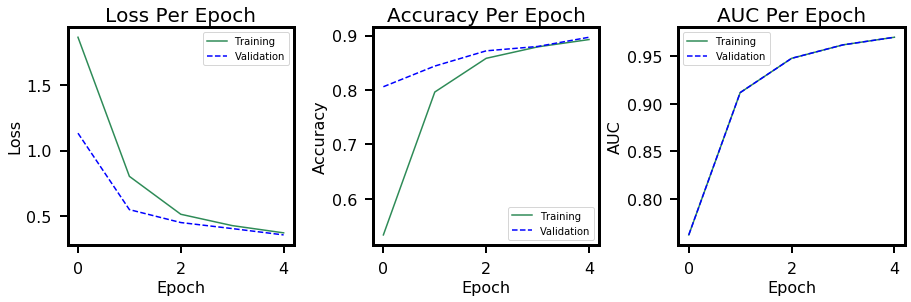

In [18]:
# specifying that we only want to plot loss and accuracy 
plots.plot_metrics_per_epoch(figsize = (15, 4), name_plot=[0, 1, 2], save_individual=False)

In [ ]:
# default is normalized, specifying non-default size for figure
plots.plot_cm(figsize=(8, 6))

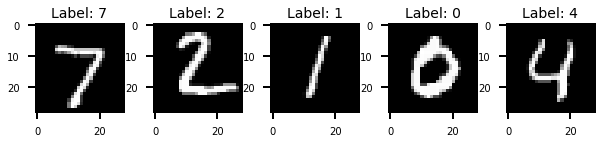

In [17]:
# you can change the figure size for all of the methods as well as the filenames
plots.plot_sample_img(figsize=(10, 5), filename="Written_Digit_Samples.png")

In [ ]:
plots.ROC_plot()

In [19]:
plots.output_average_precision()

Average precision-recall score: 0.93


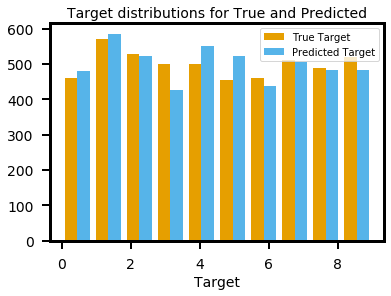

In [21]:
# you can specify whether you what type of scale you want the axes to be in the plots
plots.target_distributions(x_scale='log')

In [ ]:
# cannot create precision recall because mnist data is not a binary classification problem
# plots.precision_recall_plot()